# Project on Win Prediction Dataset

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [159]:
df = pd.read_excel('Win_Prediction_Data.xlsx')
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [160]:
df.shape

(10061, 9)

## First we do EDA Part on it

### checking any null data or not

In [161]:
# Preliminary Analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
Client Category     9982 non-null object
Solution Type       10061 non-null object
Deal Date           10061 non-null datetime64[ns]
Sector              10061 non-null object
Location            10061 non-null object
VP Name             10061 non-null object
Manager Name        10061 non-null object
Deal Cost           10061 non-null float64
Deal Status Code    10061 non-null object
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [162]:
df.isnull().sum()

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

In [163]:
# Deal Date range
print('First deal:{}\nLast Deal:{}'.format(df['Deal Date'].min(),df['Deal Date'].max()))



First deal:2011-04-19 00:00:00
Last Deal:2019-06-07 00:00:00


# Data Cleaning

### as i seen there are 79 values are missing in Client Category

In [164]:
pd.DataFrame(df.nunique())

,0
Client Category,41
Solution Type,67
Deal Date,2555
Sector,25
Location,13
VP Name,43
Manager Name,278
Deal Cost,1469
Deal Status Code,2


In [165]:
# Removing observation where Deal Cost is 0.
df = df[df["Deal Cost"]>0]
df.shape

(9815, 9)

In [166]:
# Removing Duplicates if any
df = df.drop_duplicates()
df.shape

(9802, 9)

In [167]:
df['Client Category'].mode()

0    Others
dtype: object

In [168]:
# Filling null values with mode
df['Client Category'] = df['Client Category'].fillna('Others')
df.isna().sum()

Client Category     0
Solution Type       0
Deal Date           0
Sector              0
Location            0
VP Name             0
Manager Name        0
Deal Cost           0
Deal Status Code    0
dtype: int64

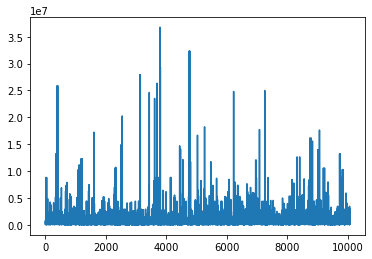

In [169]:
## we see the dealcost data 

plt.plot(df['Deal Cost'])

In [170]:
# as i see the data there is a very fluctuation in the data so we scale the data with help of minmaxscaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['Deal Cost']])
df['Deal Cost'] = scaler.transform(df[['Deal Cost']])
df['Deal Cost'].head()

0    0.004072
1    0.020248
2    0.001624
3    0.001624
4    0.002192
Name: Deal Cost, dtype: float64

In [171]:
df.describe().round(2)

,Deal Cost
count,9802.00
mean,0.02
std,0.04
min,0.00
25%,0.01
50%,0.01
75%,0.02
max,1.00


# Data Manipulation

In [172]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,0.004072,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,0.020248,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,0.001624,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,0.001624,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,0.002192,Lost


In [173]:
df['Deal_Status'] = df['Deal Status Code']
df['Deal_Status'] = df['Deal_Status'].replace({'Won':1,'Lost':0})
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Status
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,0.004072,Won,1
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,0.020248,Won,1
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,0.001624,Lost,0
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,0.001624,Lost,0
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,0.002192,Lost,0


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9802 entries, 0 to 10060
Data columns (total 10 columns):
Client Category     9802 non-null object
Solution Type       9802 non-null object
Deal Date           9802 non-null datetime64[ns]
Sector              9802 non-null object
Location            9802 non-null object
VP Name             9802 non-null object
Manager Name        9802 non-null object
Deal Cost           9802 non-null float64
Deal Status Code    9802 non-null object
Deal_Status         9802 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 842.4+ KB


In [175]:
# use seaborn for better visualization

import seaborn as sns
dir(sns)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_orig_rc_params',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'external',
 'factorplot',
 'get_dataset_names',
 'heatmap',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load_dataset',
 'lvplot',
 'matrix',
 'miscplot',
 'mpl',
 'mpl_palette',
 'pairplot',
 'palettes',
 'palplot',
 'plotting_context',
 'poin

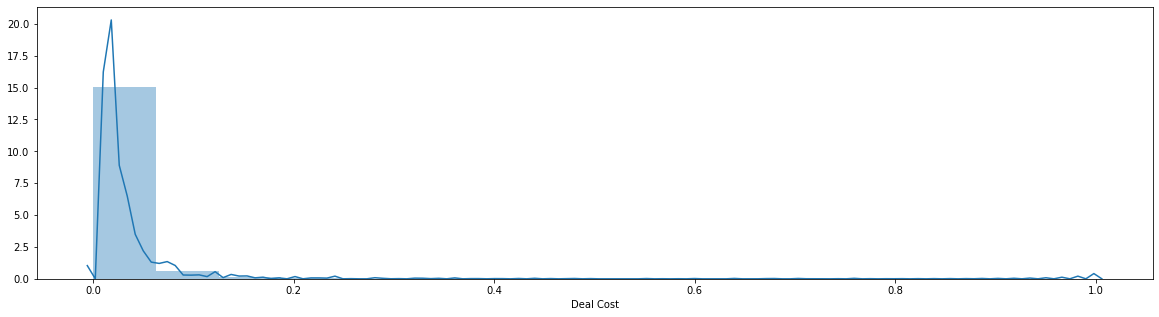

In [176]:
plt.figure(figsize = (20,5))
sns.distplot(df['Deal Cost'], kde = True, bins = 16);

In [177]:
# here we use feature engineering for this deal cost column
# we cut the values in four sections like low medium high very high

df['Cost_Range'] = pd.cut(df['Deal Cost'],bins=4,labels=["Low", "Medium", "High","Very High"])
df['Cost_Range'].value_counts()

Low          9748
Medium         38
High           10
Very High       6
Name: Cost_Range, dtype: int64

In [178]:
df.head(1)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Status,Cost_Range
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,0.004072,Won,1,Low


In [179]:
# we also doing this in deal date separate  with year
# Adding Year column
df['Deal_Year'] = df['Deal Date'].dt.year
df.head(1)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Status,Cost_Range,Deal_Year
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,0.004072,Won,1,Low,2012


In [180]:
# Seperating recent years to different dataframe
df_2016 = df[df['Deal_Year']>2016]
df_2016.head(3)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Status,Cost_Range,Deal_Year
128,Tech,Solution 7,2017-04-04,Sector 23,L10,Long Bergstrom,Russell Dahlen,0.016152,Lost,0,Low,2017
131,Medical,Solution 7,2017-04-26,Sector 14,L7,Rosanna Maynez,Marcella Mo,0.003992,Lost,0,Low,2017
136,Tech,Solution 7,2017-04-02,Sector 23,L10,Long Bergstrom,Russell Dahlen,0.016152,Lost,0,Low,2017


In [181]:
# Combining Year and Month
df['Deal_Year'] = df['Deal_Year'].astype(str)
df['Deal_Month'] = df['Deal Date'].dt.month_name()
df['Year_Month'] = df['Deal_Month'] + "-" + df['Deal_Year']
df.head(3)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Status,Cost_Range,Deal_Year,Deal_Month,Year_Month
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,0.004072,Won,1,Low,2012,March,March-2012
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,0.020248,Won,1,Low,2012,September,September-2012
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,0.001624,Lost,0,Low,2011,August,August-2011


In [182]:
# Combining VP Name and Manager
df['VP Name and Manager'] = df['VP Name'] + ' & '+ df['Manager Name']
df.head(3)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Status,Cost_Range,Deal_Year,Deal_Month,Year_Month,VP Name and Manager
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,0.004072,Won,1,Low,2012,March,March-2012,Ekta Zutshi & Gopa Trilochana
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,0.020248,Won,1,Low,2012,September,September-2012,Ekta Zutshi & Gopa Trilochana
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,0.001624,Lost,0,Low,2011,August,August-2011,Ekta Zutshi & Russell Dahlen


In [183]:
# Subsetting categorical data
df_wins = df[df['Deal Status Code']== "Won"]
df_wins.shape

(3751, 15)

In [184]:
df_wins.head(3)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Status,Cost_Range,Deal_Year,Deal_Month,Year_Month,VP Name and Manager
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,0.004072,Won,1,Low,2012,March,March-2012,Ekta Zutshi & Gopa Trilochana
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,0.020248,Won,1,Low,2012,September,September-2012,Ekta Zutshi & Gopa Trilochana
6,Internal,Solution 59,2011-11-03,Sector 2,L10,Mervin Harwood,rahul sharma,0.014304,Won,1,Low,2011,November,November-2011,Mervin Harwood & rahul sharma


In [185]:
range(int(min(df['Deal Cost'])),int(max(df['Deal Cost'])))

range(0, 1)

In [186]:
df_2016_wins = df_2016[df_2016['Deal Status Code']== "Won"]
df_2016_wins.shape

(1602, 12)

In [187]:
df_wins.head(3)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Status,Cost_Range,Deal_Year,Deal_Month,Year_Month,VP Name and Manager
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,0.004072,Won,1,Low,2012,March,March-2012,Ekta Zutshi & Gopa Trilochana
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,0.020248,Won,1,Low,2012,September,September-2012,Ekta Zutshi & Gopa Trilochana
6,Internal,Solution 59,2011-11-03,Sector 2,L10,Mervin Harwood,rahul sharma,0.014304,Won,1,Low,2011,November,November-2011,Mervin Harwood & rahul sharma


In [188]:
# Dataframe of 

def top_dealcost(x,y,n=5):
    df_topcount = df_wins.groupby([x,y])['Deal Cost','Deal_Status'].sum().sort_values(by='Deal Cost',ascending = False).head(n)
    df_topcount['Deal Cost'] = (df_topcount['Deal Cost']).round(2)
    return pd.DataFrame(df_topcount)

In [189]:
top_dealcost = pd.DataFrame(top_dealcost('VP Name','Manager Name'))


In [190]:
top_dealcost = scaler.inverse_transform(top_dealcost[['Deal Cost']])

In [191]:
top_dealcost = top_dealcost/1000000

In [192]:
top_dealcost

array([[94.85247646],
       [76.47027058],
       [69.85267646],
       [63.23508235],
       [58.45570882]])

In [193]:
df['Deal Cost'] = scaler.inverse_transform(df[['Deal Cost']])

In [194]:
df['Deal Cost'] = df['Deal Cost']/1000000

In [195]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Status,Cost_Range,Deal_Year,Deal_Month,Year_Month,VP Name and Manager
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,0.150000,Won,1,Low,2012,March,March-2012,Ekta Zutshi & Gopa Trilochana
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,0.744706,Won,1,Low,2012,September,September-2012,Ekta Zutshi & Gopa Trilochana
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,0.060000,Lost,0,Low,2011,August,August-2011,Ekta Zutshi & Russell Dahlen
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,0.060000,Lost,0,Low,2011,April,April-2011,Ekta Zutshi & Russell Dahlen
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,0.080882,Lost,0,Low,2011,June,June-2011,Ekta Zutshi & Russell Dahlen


## model building 

In [197]:
df.drop(['VP Name','Manager Name','Deal_Status','Cost_Range','Deal_Year','Deal_Month'], axis = 1, inplace = True)



In [198]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,Deal Cost,Deal Status Code,Year_Month,VP Name and Manager
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,0.150000,Won,March-2012,Ekta Zutshi & Gopa Trilochana
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,0.744706,Won,September-2012,Ekta Zutshi & Gopa Trilochana
2,Internal,Solution 59,2011-08-01,Sector 20,Others,0.060000,Lost,August-2011,Ekta Zutshi & Russell Dahlen
3,Internal,Solution 59,2011-04-28,Sector 20,Others,0.060000,Lost,April-2011,Ekta Zutshi & Russell Dahlen
4,Internal,Solution 32,2011-06-03,Sector 20,Others,0.080882,Lost,June-2011,Ekta Zutshi & Russell Dahlen


### Frequency Encoding

In [200]:
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

In [201]:
# Split data in X and Y
X = df.drop('Deal Status Code', axis = 1)

X['Deal Date'] = X['Deal Date'].map(dt.datetime.toordinal)
Y = df['Deal Status Code']

In [202]:
X.head(3)

,Client Category,Solution Type,Deal Date,Sector,Location,Deal Cost,Year_Month,VP Name and Manager
0,Telecom,Solution 7,734589,Sector 24,L5,0.150000,March-2012,Ekta Zutshi & Gopa Trilochana
1,Telecom,Solution 7,734771,Sector 24,L5,0.744706,September-2012,Ekta Zutshi & Gopa Trilochana
2,Internal,Solution 59,734350,Sector 20,Others,0.060000,August-2011,Ekta Zutshi & Russell Dahlen


In [203]:
Y.head(3)

0     Won
1     Won
2    Lost
Name: Deal Status Code, dtype: object

In [204]:
########

for col in X.select_dtypes(include = "object"):
    freq_encode = (X.groupby(col).size())/len(X)
    X[col] = X[col].map(freq_encode)
X.head()

,Client Category,Solution Type,Deal Date,Sector,Location,Deal Cost,Year_Month,VP Name and Manager
0,0.032646,0.018160,734589,0.057131,0.229443,0.150000,0.007141,0.003163
1,0.032646,0.018160,734771,0.057131,0.229443,0.744706,0.003469,0.003163
2,0.143950,0.043154,734350,0.074577,0.078555,0.060000,0.000102,0.000408
3,0.143950,0.043154,734255,0.074577,0.078555,0.060000,0.000204,0.000408
4,0.143950,0.144766,734291,0.074577,0.078555,0.080882,0.000102,0.000408


In [211]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((7351, 8), (2451, 8), (7351,), (2451,))

In [212]:
# find accuracy_score, confusion_matrix

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

def algo(algorithm):
    model = algorithm()
    model.fit(X_train, Y_train)
    predict = model.predict(X_test)
    print('The accuracy of {} model is {}'.format(model, accuracy_score(Y_test, predict).round(2)))
    print("\n")
    print("CLASSIFICATION REPORT",'\n',classification_report(Y_test, predict),"\n")
    
    print("CONFUSION MATRIX",'\n')
    plot_confusion_matrix(model, X_test, Y_test, cmap = "GnBu")

The accuracy of DecisionTreeClassifier() model is 0.73


CLASSIFICATION REPORT 
               precision    recall  f1-score   support

        Lost       0.77      0.81      0.79      1537
         Won       0.66      0.60      0.63       914

    accuracy                           0.73      2451
   macro avg       0.72      0.71      0.71      2451
weighted avg       0.73      0.73      0.73      2451
 

CONFUSION MATRIX 



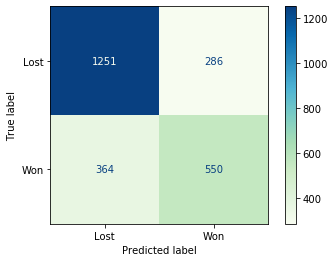

In [213]:
from sklearn.tree import DecisionTreeClassifier
algo(DecisionTreeClassifier)

The accuracy of RandomForestClassifier() model is 0.78


CLASSIFICATION REPORT 
               precision    recall  f1-score   support

        Lost       0.77      0.93      0.84      1537
         Won       0.81      0.55      0.65       914

    accuracy                           0.78      2451
   macro avg       0.79      0.74      0.75      2451
weighted avg       0.79      0.78      0.77      2451
 

CONFUSION MATRIX 



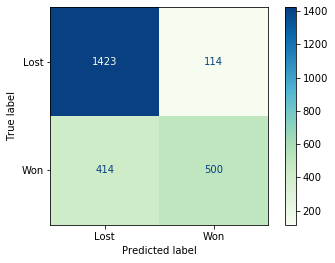

In [214]:
from sklearn.ensemble import RandomForestClassifier
algo(RandomForestClassifier)

## For every False Prediction the loss the company will face

if actual is won, but predicted is loss, then company will lose that deal amount.

In [215]:
model = RandomForestClassifier()
model.fit(X_train,Y_train)
preds = model.predict(X_test)

In [219]:
model.score(X_test,Y_test)

0.7878416972664218

In [216]:
preds = pd.Series(preds, name = "Prediction")
df_results = pd.concat([X_test, y_test], axis = 1).reset_index()
df_results = pd.concat([df_results,preds],axis = 1)

In [220]:
df_results.head(3)

,index,Client Category,Solution Type,Deal Date,Sector,Location,Deal Cost,Year_Month,VP Name and Manager,Deal Status Code,Prediction
0,6755,0.120180,0.144766,736570,0.268823,0.229443,0.286765,0.014385,0.001428,Lost,Lost
1,3008,0.041318,0.144766,735770,0.173536,0.055703,0.735294,0.011528,0.003571,Lost,Won
2,4813,0.011936,0.043971,737063,0.027443,0.333503,0.176471,0.010916,0.004285,Lost,Lost


In [222]:
df_results[(df_results['Deal Status Code']=='Won' )& (df_results['Prediction']=='Lost')]



,index,Client Category,Solution Type,Deal Date,Sector,Location,Deal Cost,Year_Month,VP Name and Manager,Deal Status Code,Prediction
7,3592,0.015405,0.014079,736559,0.027443,0.333503,0.308824,0.014385,0.006325,Won,Lost
14,6133,0.143950,0.037339,735857,0.268823,0.229443,0.685294,0.014589,0.000204,Won,Lost
18,4084,0.032646,0.043971,735753,0.057131,0.229443,0.225000,0.011528,0.001632,Won,Lost
22,4118,0.024383,0.058661,736014,0.046623,0.037441,0.308824,0.013263,0.002653,Won,Lost
32,4409,0.180167,0.144766,735927,0.268823,0.158233,0.235294,0.017649,0.000612,Won,Lost
...,...,...,...,...,...,...,...,...,...,...,...
2428,3094,0.143950,0.101408,736864,0.074577,0.078555,2.647059,0.020608,0.003367,Won,Lost
2437,6762,0.120180,0.034993,736458,0.268823,0.333503,0.147059,0.016017,0.005611,Won,Lost
2438,1143,0.033973,0.049276,735209,0.046623,0.229443,0.529412,0.009896,0.000612,Won,Lost
2447,7098,0.143950,0.139665,734583,0.074577,0.078555,1.029412,0.007141,0.004489,Won,Lost


In [218]:

df_results[(df_results['Deal Status Code']=='Won' )& (df_results['Prediction']=='Lost')]['Deal Cost'].sum().round(2)

293.15